In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

In [2]:
moons = make_moons(n_samples=200, noise=0.2, random_state=0)
X = moons[0]
y = moons[1]

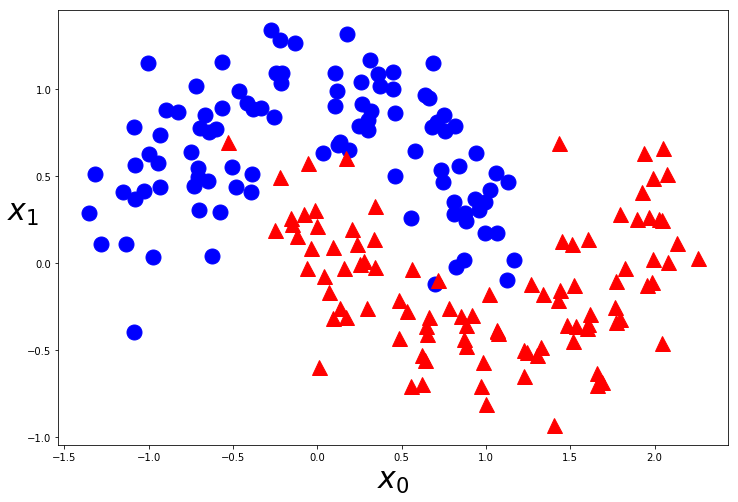

In [3]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(model, X, y, margin=0.3):
    _x1 = np.linspace(X[:, 0].min()-margin, X[:, 0].max()+margin, 100)
    _x2 = np.linspace(X[:, 1].min()-margin, X[:, 1].max()+margin, 100)
    x1, x2 = np.meshgrid(_x1, _x2)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = model.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['mediumblue', 'orangered'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    
def plot_datasets(X, y):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bo", ms=15)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "r^", ms=15) 
    plt.xlabel("$x_0$", fontsize=30)
    plt.ylabel("$x_1$", fontsize=30, rotation=0)
    
plt.figure(figsize=(12, 8))
plot_datasets(X, y)
plt.show()

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

tree_clf = DecisionTreeClassifier().fit(X_train, y_train)

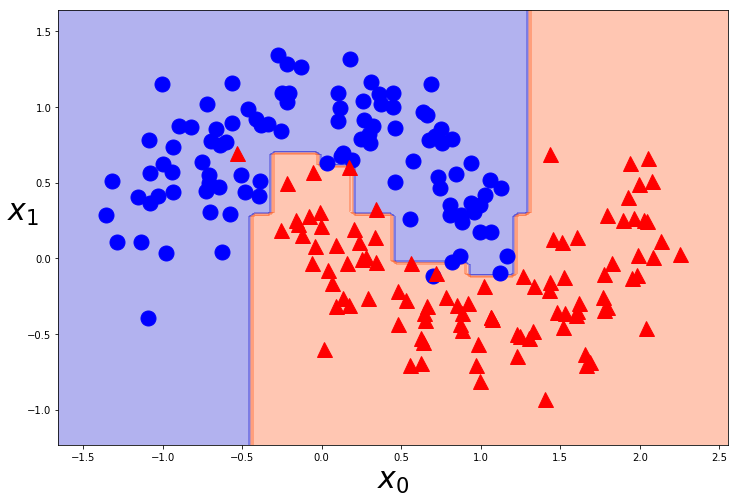

In [6]:
plt.figure(figsize=(12, 8))
plot_decision_boundary(tree_clf, X, y)
plot_datasets(X, y)
plt.show()

In [7]:
from sklearn.ensemble import RandomForestClassifier

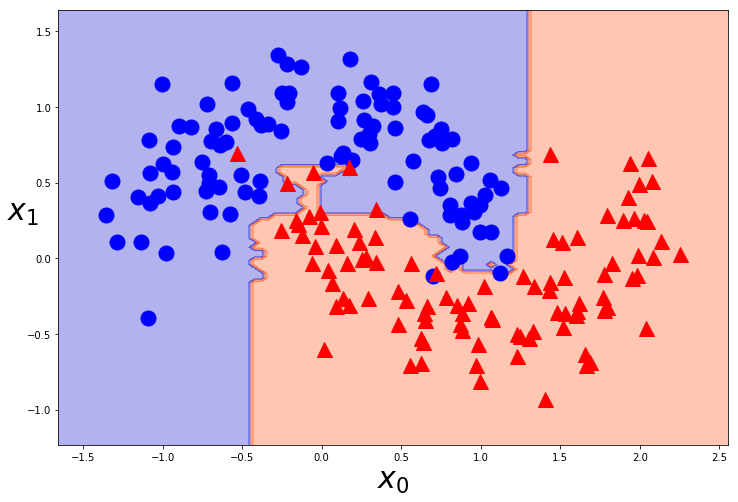

In [8]:
random_forest = RandomForestClassifier(n_estimators=100, random_state=0).fit(X_train, y_train)

plt.figure(figsize=(12, 8))
plot_decision_boundary(random_forest, X, y)
plot_datasets(X, y)
plt.show()

In [9]:
from sklearn.datasets import load_iris

In [10]:
iris = load_iris()
X_iris = iris.data
y_iris = iris.target

In [11]:
random_forest_iris = RandomForestClassifier(random_state=0).fit(X_iris, y_iris)

In [12]:
random_forest_iris.feature_importances_

array([0.11896532, 0.0231668 , 0.36804744, 0.48982043])

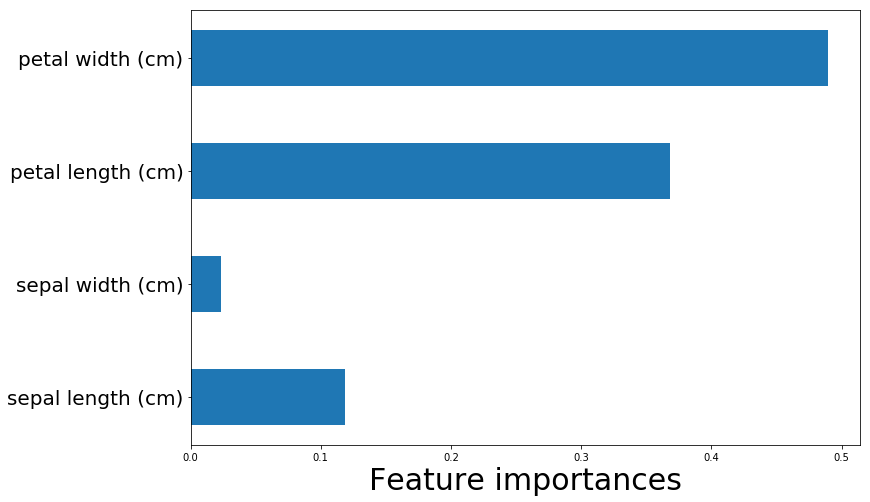

In [13]:
plt.figure(figsize=(12, 8))
plt.barh(range(iris.data.shape[1]), random_forest_iris.feature_importances_, height=0.5)
plt.yticks(range(iris.data.shape[1]), iris.feature_names, fontsize=20)
plt.xlabel("Feature importances", fontsize=30)
plt.show()

In [54]:
import pandas as pd

In [55]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [57]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [59]:
from sklearn.preprocessing import LabelEncoder

cat_features = ['Sex', 'Embarked']

for col in cat_features:
    lbl = LabelEncoder()
    df[col] = lbl.fit_transform(list(df[col].values))

In [60]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2


In [61]:
X = df.drop(columns=['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'])
y = df['Survived']

In [62]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2


In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [64]:
tree = DecisionTreeClassifier().fit(X_train, y_train)
tree.score(X_test, y_test)

0.7668161434977578

In [65]:
rnd_forest = RandomForestClassifier(n_estimators=500, max_depth=5, random_state=0).fit(X_train, y_train)

In [66]:
rnd_forest.score(X_test, y_test)

0.8295964125560538

In [67]:
test_df = pd.read_csv('test.csv')
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [68]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [69]:
test_df['Age'] = test_df['Age'].fillna(test_df['Age'].mean())
test_df['Fare'] = test_df['Fare'].fillna(test_df['Fare'].mean())

In [70]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           418 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [71]:
for col in cat_features:
    lbl = LabelEncoder()
    test_df[col] = lbl.fit_transform(list(test_df[col].values))

In [72]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,2
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,1
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,2


In [73]:
X_pred = test_df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])
ID = test_df['PassengerId']

In [74]:
prediction = rnd_forest.predict(X_pred)
prediction

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [35]:
submisson = pd.DataFrame({
    'PassengerId': ID,
    'Survived': prediction
})
submisson

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [36]:
submisson.to_csv('submisson.csv', index=False)

In [37]:
import xgboost as xgb

In [114]:
params = {
    "objective": "binary:logistic", 
    "eval_metric": "auc",
    "eta": 0.1, 
    "max_depth": 6,  
    "subsample": 1, 
    "colsample_bytree": 0.7,
    "silent": 1
}

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

model = xgb.train(params=params, 
                  dtrain=dtrain,
                  num_boost_round=1000,
                  early_stopping_rounds=10,
                  evals=[(dtest, 'test')]
                 )

[0]	test-auc:0.826996
Will train until test-auc hasn't improved in 10 rounds.
[1]	test-auc:0.874572
[2]	test-auc:0.859113
[3]	test-auc:0.867634
[4]	test-auc:0.879239
[5]	test-auc:0.884764
[6]	test-auc:0.885492
[7]	test-auc:0.886048
[8]	test-auc:0.891316
[9]	test-auc:0.891101
[10]	test-auc:0.891615
[11]	test-auc:0.89153
[12]	test-auc:0.892343
[13]	test-auc:0.891915
[14]	test-auc:0.892814
[15]	test-auc:0.891016
[16]	test-auc:0.892557
[17]	test-auc:0.893499
[18]	test-auc:0.893285
[19]	test-auc:0.892643
[20]	test-auc:0.892814
[21]	test-auc:0.89153
[22]	test-auc:0.893243
[23]	test-auc:0.895298
[24]	test-auc:0.896326
[25]	test-auc:0.896497
[26]	test-auc:0.896711
[27]	test-auc:0.894827
[28]	test-auc:0.895084
[29]	test-auc:0.894998
[30]	test-auc:0.894399
[31]	test-auc:0.893799
[32]	test-auc:0.892771
[33]	test-auc:0.8926
[34]	test-auc:0.893628
[35]	test-auc:0.894484
[36]	test-auc:0.894228
Stopping. Best iteration:
[26]	test-auc:0.896711



In [106]:
prediction = model.predict(xgb.DMatrix(X_pred), ntree_limit=model.best_ntree_limit)
prediction = np.where(prediction < 0.5, 0, 1)
prediction

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [104]:
submisson = pd.DataFrame({
    'PassengerId': ID,
    'Survived': prediction
})
submisson.to_csv('submisson.csv', index=False)